In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/placement/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

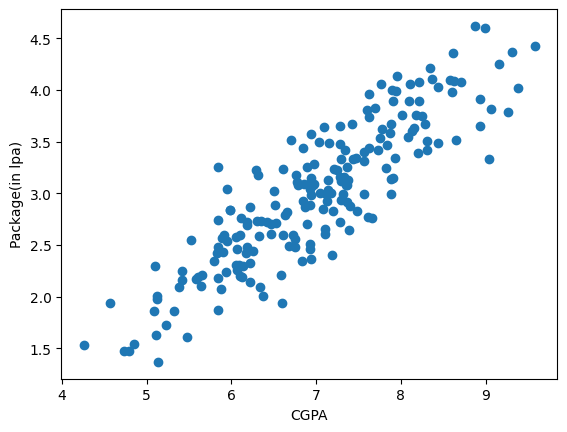

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
print(X)
print("**************")
print(y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]
**************
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [9]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
'''When you call train_test_split, the dataset is shuffled randomly before splitting 
into training and testing sets. If random_state is set to an integer (e.g., 2), it uses that integer 
as the seed for the random number generator, ensuring the same shuffle order every time you run the 
code with that seed.
If random_state is set to None (default), the random number generator is initialized based on the 
current system time, resulting in a different split every time the code is run.
If random_state is set to a fixed integer (e.g., random_state=42), the exact same random split will
be used every time.

Purpose of random_state
The random_state ensures that the split between the training and testing data is reproducible. It essentially
acts as a seed for the random number generator used during the splitting process.
If you use the same random_state value, you will get the same split every time you run the code, which is 
important for ensuring that your experiments are consistent.

Purpose of test_size
test_size=0.2 means 20% of the data will be in the test set, and 80% will be in the training set.
''' 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression
# creating lr as object of linear regression 
lr = LinearRegression()
# train the data
lr.fit(X_train,y_train)

LinearRegression()

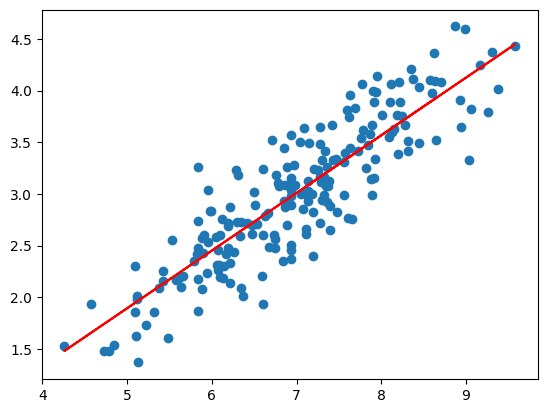

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')

Text(0, 0.5, 'Package(in lpa)')

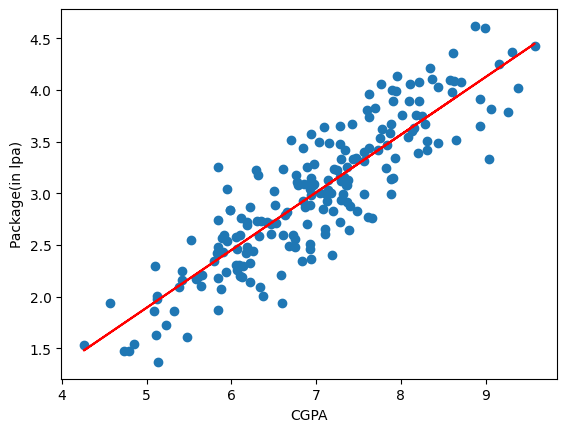

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [17]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [18]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [19]:
# r2 score - 1st time

print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [20]:
# Adjusted R2 score 
X_test.shape

(40, 1)

In [21]:
# adjusted r2 score -- 1st time
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [36]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
# new_df1
new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.141463,3.26
1,5.12,0.510287,1.98
2,7.82,0.345890,3.25
3,7.42,0.850538,3.67
4,6.94,0.935012,3.57


Text(0, 0.5, 'Package(in lpa)')

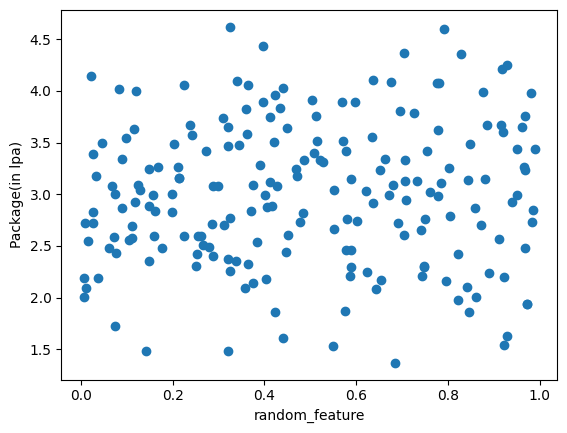

In [23]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [25]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

'''r2 score -- 2nd time -- because of IRRELEVANT COLUMN added the r2 score has INCREASED 
a little bit which is -- NOT DESIRABLE'''

print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7811263210903618


In [26]:
'''adjusted r2 score -- 2nd time -- IRRELEVANT column added -- DECREASED '''
1 - ((1-r2)*(40-1)/(40-1-2))

0.7692953114195706

In [27]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [28]:
new_df2.sample(5)

,cgpa,iq,package
70,5.79,2.75,2.35
158,5.95,3.44,3.04
131,6.37,0.91,2.01
35,6.87,3.87,2.87
116,9.04,2.53,3.33


Text(0, 0.5, 'Package(in lpa)')

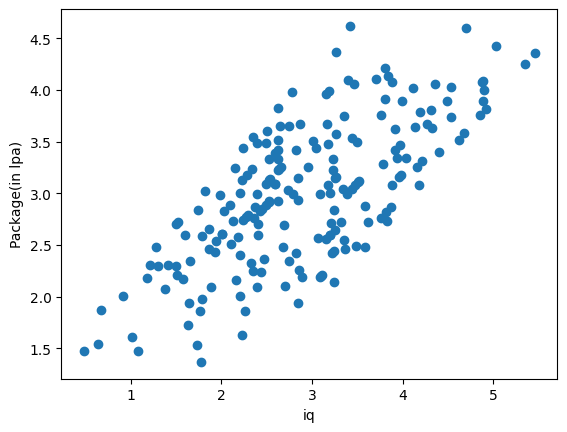

In [29]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [30]:
np.random.randint(-100,100)

-17

In [31]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

''' r2 score -- RELEVANT column added -- r2 score INCREASED '''
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8420597786506058


In [37]:
''' adjusted r2 score -- 3rd time -- relevant column added -- adjusted r2 score INCREASED '''
1 - ((1-r2)*(40-1)/(40-1-2))

0.8335224693884764